# Customer Loan Prediction Model
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True) 
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from scipy import stats
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.options.display.float_format = "{:,.2f}".format

In [2]:
df=pd.read_csv("C:\\Users\\vsatheesh\\Documents\\Bank_Personal_Loan_Modelling.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## Attribute Information:
* **ID** : Customer ID

* **Age** : Customer's age in completed years

* **Experience** : #years of professional experience

* **Income** : Annual income of the customer (in thousands)

* **ZIP Code** : Home Address ZIP code.

* **Family** : Family size of the customer

* **CCAvg** : Avg. spending on credit cards per month (in thousands)

* **Education** : Education Level.1. Undergrad 2. Graduate 3.Advanced/Professional

* **Mortgage** : Value of house mortgage if any. (in thousands)

* **Personal Loan** : Did this customer accept the personal loan offered in the last campaign?

* **Securities Account** : Does the customer have a securities account with the bank?

* **CD Account** : Does the customer have a certificate of deposit (CD) account with the bank?

* **Online** : Does the customer use internet banking facilities?

* **Credit card** : Does the customer use a credit card issued by UniversalBank?

In [4]:
df.shape

(5000, 14)

In [5]:
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [6]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [73]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,"5,000.00","2,500.50","1,443.52",1.00,"1,250.75","2,500.50","3,750.25","5,000.00"
Age,"5,000.00",45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,"5,000.00",20.10,11.47,-3.00,10.00,20.00,30.00,43.00
Income,"5,000.00",73.77,46.03,8.00,39.00,64.00,98.00,224.00
Family,"5,000.00",2.40,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,"5,000.00",1.94,1.75,0.00,0.70,1.50,2.50,10.00
Education,"5,000.00",1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,"5,000.00",56.50,101.71,0.00,0.00,0.00,101.00,635.00
Personal Loan,"5,000.00",0.10,0.29,0.00,0.00,0.00,0.00,1.00
Securities Account,"5,000.00",0.10,0.31,0.00,0.00,0.00,0.00,1.00


## Explanatory Data Analysis


* **Age**: numerical, quantitative variable. Min age in the dataset being 23 and max being 67. Since the mean is almost similar to median, we can say that Age is normally distributed.
* **Experience**: numerical, quantitative variable. Min experience in the dataset being -3 and max experience being 43.Since the mean is almost similar to median, we can say that Experience is normally distributed.
* **Income**: numerical, quantitative variable. Min income being 8,000 dollars while the maximum income being 224,000 dollars.Range of Q1 to Q3 is between 39 to 98. Since mean is greater than median, we can say that Income is right (positively) skewed.
* **ZIP Code**: categorical variable.
* **Family**: categorical, ordinal variable. Lowest family size being 1 and max being 4.
* **CCAvg**: numerical, quantitative variable.Min average spending on credit cards/month being 0 dollars and maximum being 10,000 dollars.Range of Q1 to Q3 is between 0.70 to 2.50. Since mean is greater than median, we can say that CCAvg is right (positively) skewed.
* **Education**: categorical, qualitative, ordinal variable. *1: Undergrad; 2: Graduate; 3: Advanced/Professional*
* **Mortgage**: numerical, quantitative variable. Min mortage value in the dataset being 0 dollars, which means there was no house mortage, and maximum value being 635,000 dollars.75% of data values are around 101,000 dollars whereas the maximum value being 635,000 dollars. Mortage is highly right skewed.
* **Personal Loan**: target variable. categorical, qualitative. If the customer accepted the personal loan offered in the last campaign then 1 else 0.
* **Securities Account**: categorical, qualitative variable. If the customer has a securities account with the bank then 1 else 0.
* **CD Account**: categorical, qualitatitve variable.If the customer has a certificate of deposit account with the bank then 1 else 0.
* ***Online**: categorical, qualitative varaiable. If the customer uses internet banking facilities then 1 else 0.
* **CreditCard**categorical, qualitative variable. If the customer use a credit card issued by UniversalBank then 1 else 0.

In [7]:
df.drop(['ZIP Code'],inplace=True,axis=1)
df.set_index('ID')

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,
1,25,1,49,4,1.60,1,0,0,1,0,0,0
2,45,19,34,3,1.50,1,0,0,1,0,0,0
3,39,15,11,1,1.00,1,0,0,0,0,0,0
4,35,9,100,1,2.70,2,0,0,0,0,0,0
5,35,8,45,4,1.00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4996,29,3,40,1,1.90,3,0,0,0,0,1,0
4997,30,4,15,4,0.40,1,85,0,0,0,1,0
4998,63,39,24,2,0.30,3,0,0,0,0,0,0


In [8]:
df.Education.value_counts(normalize=True)*100

1   41.92
3   30.02
2   28.06
Name: Education, dtype: float64

In [9]:
df.Family.value_counts(normalize=True)*100

1   29.44
2   25.92
4   24.44
3   20.20
Name: Family, dtype: float64

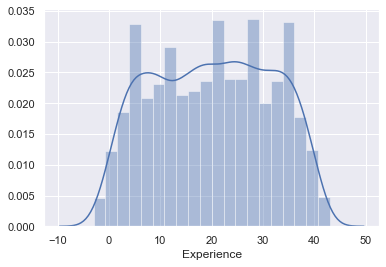

In [10]:
sns.distplot(df['Experience']);

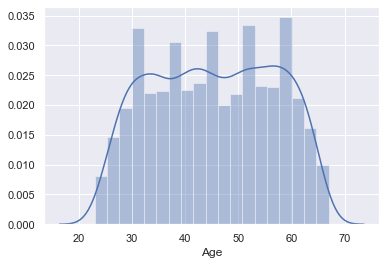

In [11]:
sns.distplot(df['Age']);

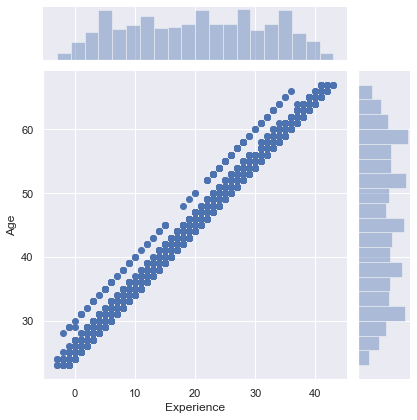

In [12]:
sns.jointplot(df['Experience'], df['Age']);

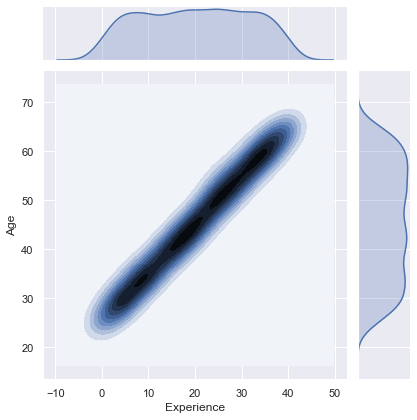

In [13]:
sns.jointplot(df['Experience'], df['Age'],  kind="kde");

Text(0.5, 1.0, 'Distribution of Mortgage for taking Personal Loan')

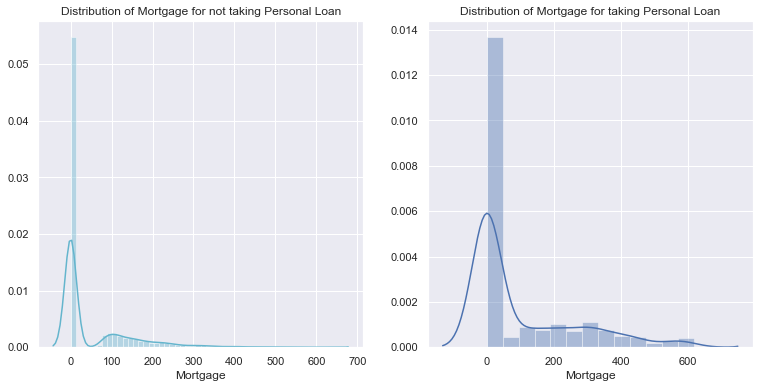

In [14]:
# Distribution of Mortgage
fig = plt.figure(figsize = (12.8, 6))

ax = fig.add_subplot(121)
sns.distplot(df[(df['Personal Loan'] == 0)]['Mortgage'], color = 'c', 
             ax = ax).set_title('Distribution of Mortgage for not taking Personal Loan')

ax= fig.add_subplot(122)
sns.distplot(df[(df['Personal Loan'] == 1)]['Mortgage'], color = 'b', 
             ax = ax).set_title('Distribution of Mortgage for taking Personal Loan')

Text(0.5, 1.0, 'Distribution of CCAvg for taking Personal Loan')

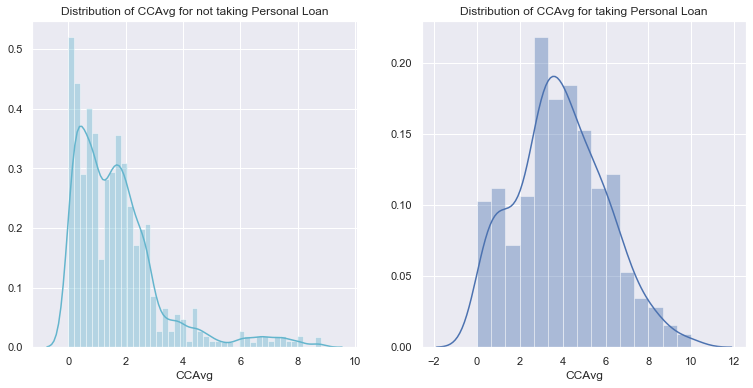

In [15]:
# Distribution of CCAvg
fig = plt.figure(figsize = (12.8, 6))

ax = fig.add_subplot(121)
sns.distplot(df[(df['Personal Loan'] == 0)]['CCAvg'], color = 'c', ax = ax).set_title('Distribution of CCAvg for not taking Personal Loan')

ax= fig.add_subplot(122)
sns.distplot(df[(df['Personal Loan'] == 1)]['CCAvg'], color = 'b', ax = ax).set_title('Distribution of CCAvg for taking Personal Loan')

Text(0.5, 1.0, 'Distribution of Income for taking Personal Loan')

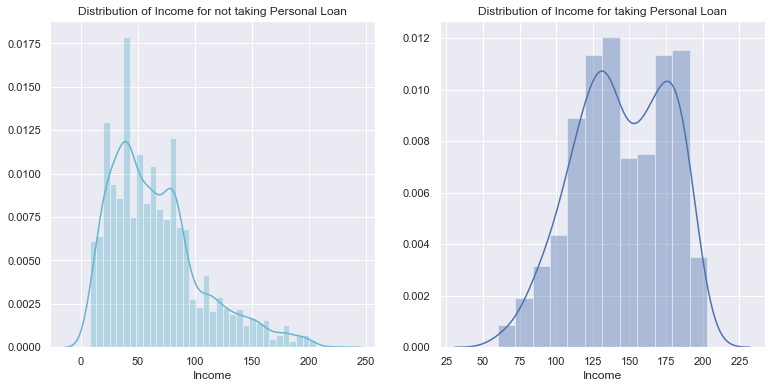

In [59]:
# Distribution of Income
fig = plt.figure(figsize = (12.8, 6))

ax = fig.add_subplot(121)
sns.distplot(df[(df['Personal Loan'] == 0)]['Income'], color = 'c', 
             ax = ax).set_title('Distribution of Income for not taking Personal Loan')

ax= fig.add_subplot(122)
sns.distplot(df[(df['Personal Loan'] == 1)]['Income'], color = 'b', 
             ax = ax).set_title('Distribution of Income for taking Personal Loan')

In [ ]:
sns.pairplot(df).fig.set_size_inches(15,15)

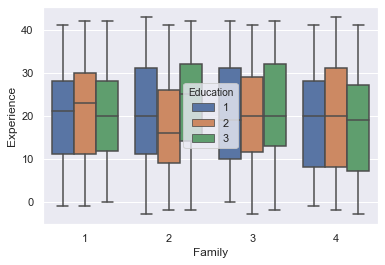

In [17]:
sns.boxplot(df['Family'], df['Experience'],hue=df['Education']);

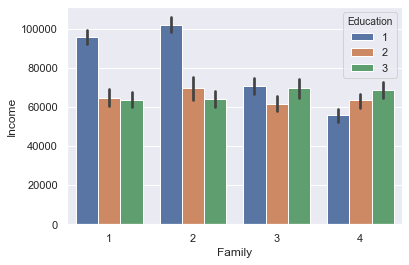

In [18]:
sns.barplot(df['Family'], df['Income']*1000,hue=df['Education'])

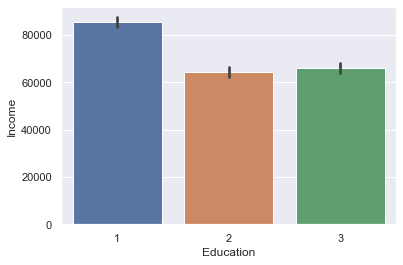

In [19]:
sns.barplot(df['Education'], df['Income']*1000)

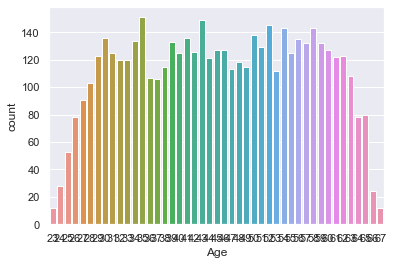

In [20]:
sns.countplot(x="Age",  data=df)

Text(0.5, 1.0, 'Distribution of Income by Personal Loan')

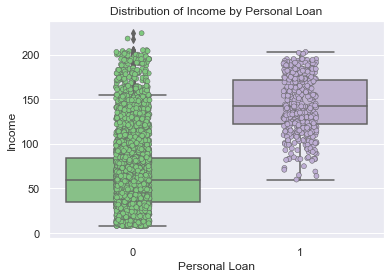

In [64]:
# Distribution of Income by Personal Loan
ax = sns.boxplot(x = 'Personal Loan', y = 'Income', palette = 'Accent', data = df)
ax = sns.stripplot(x = 'Personal Loan', y = 'Income', palette = 'Accent', data = df, 
              jitter = True, dodge = True, linewidth = 0.5)
ax.set_title('Distribution of Income by Personal Loan')

Text(0.5, 1.0, 'Distribution of Average Spending on Credit Card by Personal Loan')

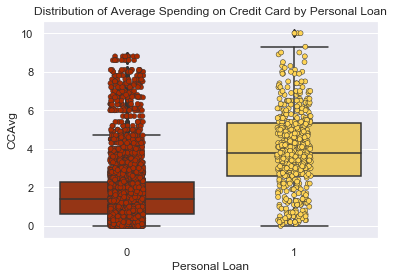

In [66]:
# Distribution of Average Spending on Credit Card by Personal Loan
ax = sns.boxplot(x = 'Personal Loan', y = 'CCAvg', palette = 'afmhot', data = df)
ax = sns.stripplot(x = 'Personal Loan', y = 'CCAvg', palette = 'afmhot', data = df, 
              jitter = True, dodge = True, linewidth = 0.5)
ax.set_title('Distribution of Average Spending on Credit Card by Personal Loan')

<Figure size 921.6x432 with 0 Axes>

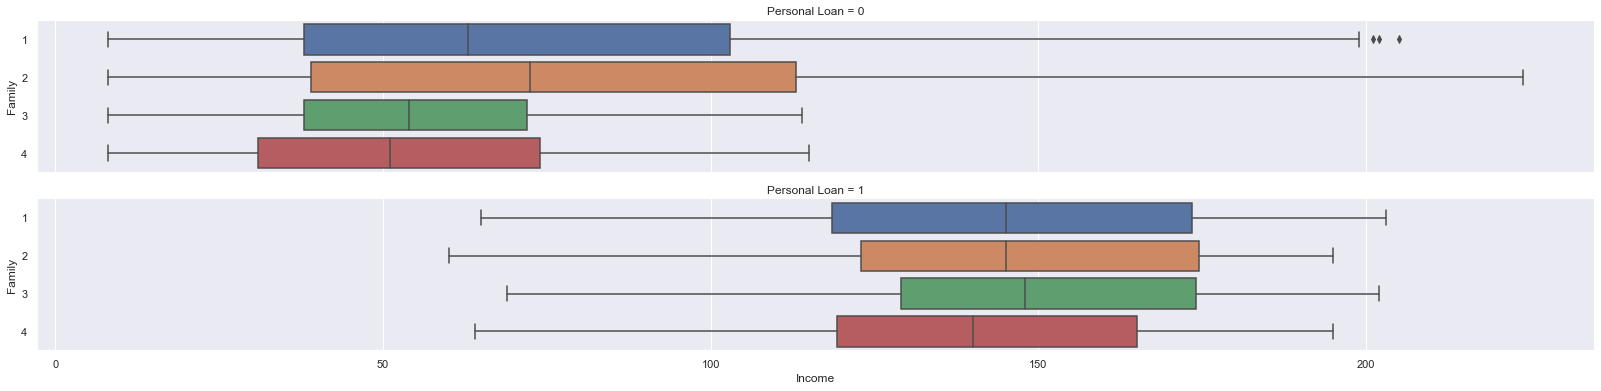

In [67]:
# Distribution of Family Size by Personal Loan and affect of Income
plt.figure(figsize = (12.8 , 6))
sns.catplot(x = 'Income', y = 'Family', row = 'Personal Loan', kind = 'box', orient = 'h', height = 2.8, aspect = 8, 
            data = df)

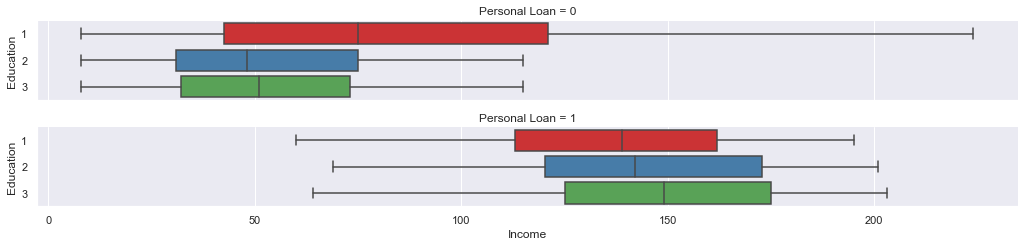

In [71]:
# Distribution of Education by Personal Loan and affect of Income
sns.catplot(x = 'Income', y = 'Education', row = 'Personal Loan', kind = 'box', orient = 'h', 
            height = 1.8, aspect = 8, palette = "Set1", data = df)

In [21]:
def plot_corr(df, size=11):
    corr = df.corr()
    corr=np.round(corr,decimals=2)
    fig, ax = plt.subplots(figsize=(size, size))
    sns.heatmap(corr, annot=True)
    ax.grid(False)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

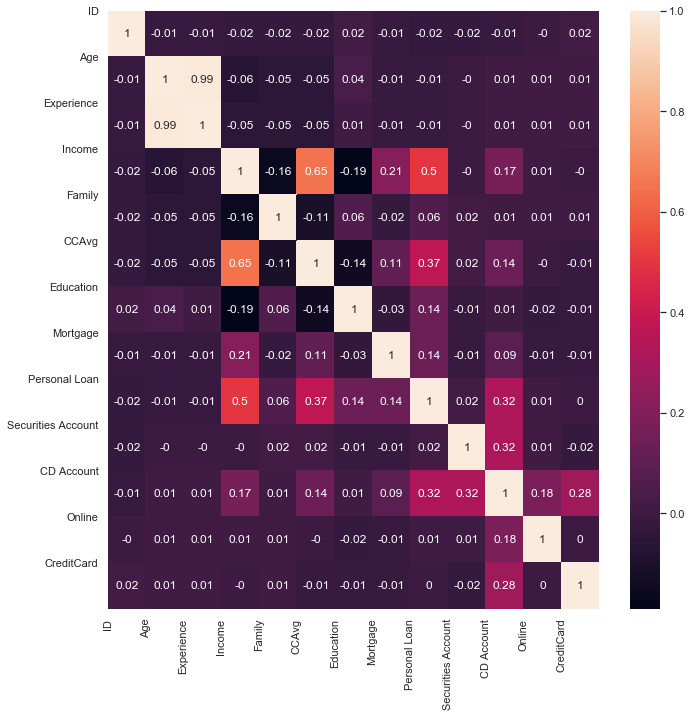

In [22]:
plot_corr(df)

In [23]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [24]:
Categorical_features=['Family', 'Education']

In [25]:
encoded_df=pd.get_dummies(df,columns=Categorical_features,drop_first = True )
encoded_df.drop(['ID'],inplace=True,axis=1)
encoded_df.columns

Index(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Personal Loan',
       'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Family_2',
       'Family_3', 'Family_4', 'Education_2', 'Education_3'],
      dtype='object')

In [26]:
import statsmodels.api as sm
X = sm.add_constant( encoded_df )
Y=encoded_df['Personal Loan']
X.drop(['Personal Loan'],inplace=True,axis=1)
train_X, test_X, train_Y, test_Y = train_test_split(X ,Y,train_size = 0.7,random_state = 100 )

In [27]:
train_X.head()

,const,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3
4966,1.00,41,17,34,0.70,143,0,0,0,0,0,0,0,0,0
4086,1.00,50,26,11,0.20,0,1,0,0,0,0,0,1,0,0
2881,1.00,49,25,55,0.10,0,0,0,1,0,0,0,1,0,1
1237,1.00,38,13,169,6.80,0,0,1,1,1,0,0,0,0,1
1429,1.00,31,5,35,0.60,171,0,0,0,0,0,0,0,0,1


In [28]:
from pandas import DataFrame
train_Y=DataFrame(train_Y)
train_Y.head()

,Personal Loan
4966,0
4086,0
2881,0
1237,1
1429,0


In [29]:
print("{0:0.2f}% data is in training set".format((len(train_X)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(test_X)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [30]:
print("Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(df.loc[df['Personal Loan'] == 1]), (len(df.loc[df['Personal Loan'] == 1])/len(df.index)) * 100))
print("Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(df.loc[df['Personal Loan'] == 0]), (len(df.loc[df['Personal Loan'] == 0])/len(df.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(train_Y.loc[train_Y['Personal Loan'] == 1]), (len(train_Y.loc[train_Y['Personal Loan'] == 1])/len(train_Y)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(train_Y.loc[train_Y['Personal Loan'] == 0]), (len(train_Y.loc[train_Y['Personal Loan'] == 0])/len(train_Y)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(test_Y[test_Y[:] == 1]), (len(test_Y[test_Y[:] == 1])/len(test_Y)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(test_Y[test_Y[:] == 0]), (len(test_Y[test_Y[:] == 0])/len(test_Y)) * 100))
print("")

Personal Loan True Values    : 480 (9.60%)
Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 322 (9.20%)
Training Personal Loan False Values   : 3178 (90.80%)

Test Personal Loan True Values        : 158 (10.53%)
Test Personal Loan False Values       : 1342 (89.47%)



In [31]:
train_Y.shape

(3500, 1)

In [32]:
logit = sm.Logit(train_Y, train_X)
logit_model = logit.fit()
logit_model.summary2()

Optimization terminated successfully.
         Current function value: 0.106735
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:                Logit            Pseudo R-squared: 0.652      
Dependent Variable:   Personal Loan    AIC:              777.1465   
Date:                 2020-08-23 10:47 BIC:              869.5543   
No. Observations:     3500             Log-Likelihood:   -373.57    
Df Model:             14               LL-Null:          -1075.0    
Df Residuals:         3485             LLR p-value:      3.9771e-291
Converged:            1.0000           Scale:            1.0000     
No. Iterations:       10.0000                                       
--------------------------------------------------------------------
                    Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
--------------------------------------------------------------------
const              -13.0107   2.2257 -5.8457 0.0000 -17.3730 -8.6484
Age                 -0.0290   0.0815 -0.3556 0.7221  -0.1888  0.1308
Experience           0.0458   0.0811  0.5638 0.5729  -0.1133  0.2048
Income               0.0665   0.0040 16.6643 0.0000   0.0587  0.0743
CCAvg                0.2061   0.0576  3.5785 0.0003   0.0932  0.3189
Mortgage             0.0011   0.0008  1.4002 0.1615  -0.0004  0.0025
Securities Account  -0.5490   0.3559 -1.5426 0.1229  -1.2465  0.1485
CD Account           3.3431   0.4145  8.0655 0.0000   2.5307  4.1555
Online              -1.0257   0.2107 -4.8691 0.0000  -1.4385 -0.6128
CreditCard          -0.7890   0.2538 -3.1081 0.0019  -1.2865 -0.2914
Family_2            -0.2829   0.2914 -0.9708 0.3316  -0.8542  0.2883
Family_3             1.7873   0.3095  5.7749 0.0000   1.1807  2.3939
Family_4             1.6427   0.2920  5.6254 0.0000   1.0704  2.2151
Education_2          4.3104   0.3626 11.8865 0.0000   3.5997  5.0212
Education_3          4.5348   0.3549 12.7774 0.0000   3.8392  5.2304
====================================================================

"""

In [33]:
def get_significant_vars( lm ):
  var_p_vals_df = pd.DataFrame( lm.pvalues )
  var_p_vals_df['vars'] = var_p_vals_df.index
  var_p_vals_df.columns = ['pvals', 'vars']
  return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [34]:
significant_vars = get_significant_vars( logit_model )
significant_vars

['const',
 'Income',
 'CCAvg',
 'CD Account',
 'Online',
 'CreditCard',
 'Family_3',
 'Family_4',
 'Education_2',
 'Education_3']

In [35]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(train_X[significant_vars], train_Y)
#predict on test
predict_Y = model.predict(test_X[significant_vars])
pred_prob_Y = model.predict_proba(test_X[significant_vars])


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

      0    1    2    3     4     5    6    7    8    9  intercept
0 -5.27 0.05 0.13 2.55 -0.85 -0.63 1.43 1.34 3.02 3.20      -5.27


In [36]:
model_score = model.score(test_X[significant_vars], test_Y)
print(model_score)

0.952


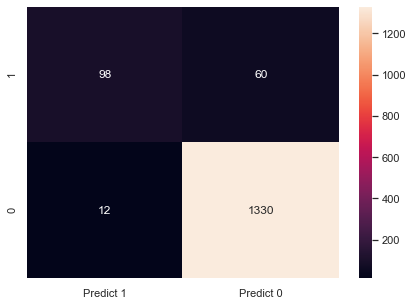

In [37]:
cm=metrics.confusion_matrix(test_Y, predict_Y, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

In [38]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,predict_Y))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1342
           1       0.89      0.62      0.73       158

    accuracy                           0.95      1500
   macro avg       0.92      0.81      0.85      1500
weighted avg       0.95      0.95      0.95      1500



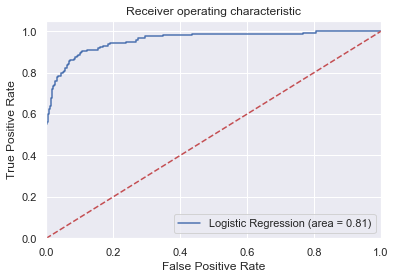

In [39]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logit_roc_auc = roc_auc_score(test_Y,predict_Y )
fpr, tpr, thresholds = roc_curve(test_Y, pred_prob_Y[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [40]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.
from scipy.stats import zscore
X_KNN=df.set_index('ID')
Categorical_features=['Family', 'Education']
encoded_X_KNN=pd.get_dummies(df,columns=Categorical_features,drop_first = True )
encoded_X_KNN.drop(['ID'],inplace=True,axis=1)
encoded_X_KNN.columns

Index(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Personal Loan',
       'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Family_2',
       'Family_3', 'Family_4', 'Education_2', 'Education_3'],
      dtype='object')

In [41]:
Y_KNN=encoded_X_KNN['Personal Loan']
encoded_X_KNN.drop(['Personal Loan'],inplace=True,axis=1)

In [42]:
XScaled  = encoded_X_KNN.apply(zscore)  # convert all attributes to Z scale 
XScaled.describe()

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3
count,"5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00"
mean,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.95,-2.01,-1.43,-1.11,-0.56,-0.34,-0.25,-1.22,-0.65,-0.59,-0.50,-0.57,-0.62,-0.65
25%,-0.90,-0.88,-0.76,-0.71,-0.56,-0.34,-0.25,-1.22,-0.65,-0.59,-0.50,-0.57,-0.62,-0.65
50%,-0.03,-0.01,-0.21,-0.25,-0.56,-0.34,-0.25,0.82,-0.65,-0.59,-0.50,-0.57,-0.62,-0.65
75%,0.84,0.86,0.53,0.32,0.44,-0.34,-0.25,0.82,1.55,1.69,-0.50,-0.57,1.60,1.53
max,1.89,2.00,3.26,4.61,5.69,2.93,3.94,0.82,1.55,1.69,1.99,1.76,1.60,1.53


In [43]:
X_train, X_test, y_train, y_test = train_test_split(XScaled,Y_KNN, test_size=0.30, random_state=1)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [45]:
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [46]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predict_Y_KNN = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.95

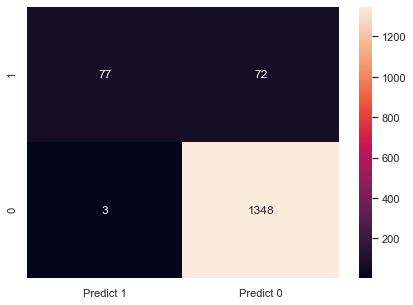

In [47]:
cm=metrics.confusion_matrix(y_test, predict_Y_KNN, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict_Y_KNN))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1351
           1       0.96      0.52      0.67       149

    accuracy                           0.95      1500
   macro avg       0.96      0.76      0.82      1500
weighted avg       0.95      0.95      0.94      1500



In [49]:
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))

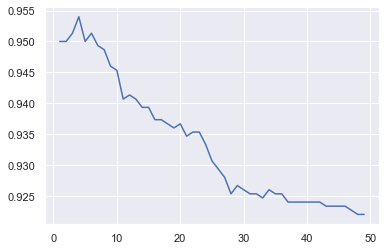

In [50]:
plt.plot(range(1,50),scores)

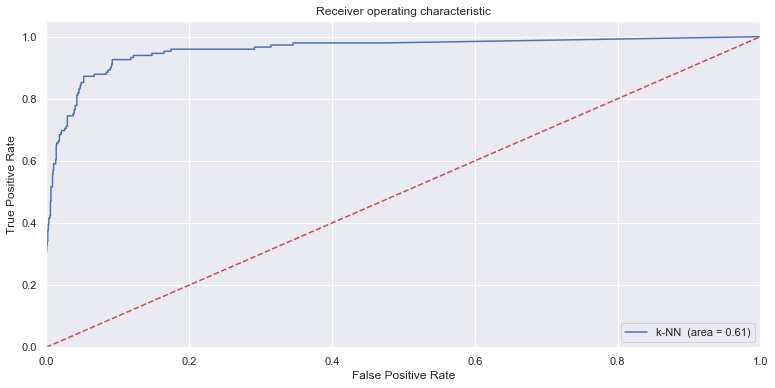

In [51]:
# ROC Curve
KNN_roc_auc = roc_auc_score(y_test, NNH.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, NNH.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'k-NN  (area = {})'.\
         format(KNN_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

In [52]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [53]:
predict_Y_NB = NB.predict(X_test)
NB.score(X_test, y_test)

0.876

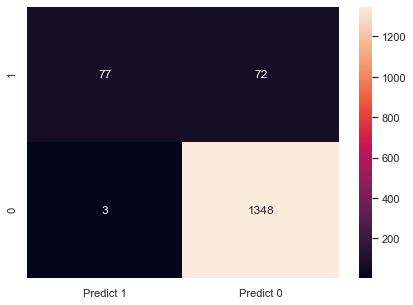

In [54]:
cm=metrics.confusion_matrix(y_test, predict_Y_KNN, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict_Y_NB))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.41      0.57      0.48       149

    accuracy                           0.88      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.88      0.88      1500



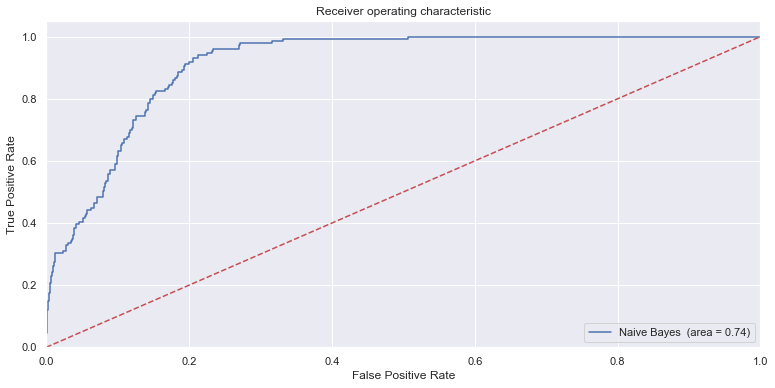

In [58]:
# ROC Curve
NB_roc_auc = roc_auc_score(y_test, NB.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, NB.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'Naive Bayes  (area = {})'.\
         format(NB_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

### Conclusion and understanding of models results

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a = healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better
target marketing to increase the success ratio with minimal budget.

ML models works well when the number of classes are in equal proportion. They are designed to maximize accuracy and reduce error. Thus, they do not take into account the distribution or balance of classes. In the dataset **Bank_Personal_Loan_Modelling**, 9.6% customer are offered bank loan offered whereas 90.4% of customers didn't accept the loan offered (class 0).

The confusion matrix is an important metric that is often used to measure the performance of a classification algorithm. It visualizes the accuracy of a classifier by comparing the actual and predicted classes. 
The confusion matrix for class 1 (Accepted) would look like:

|                        | Predicted: 0 (Not Accepted) | Predicted: 1 (Accepted)|
|------------------------|-----------------------------|------------------------|
|**Actual: 0 (Not Accepted)**| True Negatives              | False Positives        |
|**Actual: 1 (Accepted)**    | False Negatives             | True Positives         |

Metrics that can be calculated from confusion matrix:
* **Precision**: It measures how likely the prediction of the positive class is correct.When it predicts the positive result, how often is it correct? i.e. limit the number of false positives. Precision alone is not very helpful because it ignores the negative class. 
* **Recall**: It measures how good our model is at correctly predicting positive classes.When it is actually the positive result, how often does it predict correctly? i.e. limit the number of false negatives.
* **Precision or Recall ?**
We cannot try to maximize both precision and recall because there is a trade-off between them. Increasing precision decreases recall and vice versa. We can aim to maximize precision or recall depending on the task.
Consider an email spam detection model, we try to maximize precision because we want to be correct when an email is detected as spam. We do not want to label a normal email as spam (i.e. false positive). It is acceptable if the model cannot catch a few spam emails. However, if a very important email is marked as spam, the consequences might be severe.
On the other hand, for a cancel cell detection task, we need to maximize recall because we want to detect every positive class (malignant cell). If the model predicts a malignant cell as benign (i.e. false negative), it would be a crucial mistake.
There is another measure that combines precision and recall into a single number and that is F1 score.
* **f1-score**: Harmonic mean of precision and recall.

The confusion matrix for class 1 (Accepted) would look like:

|                        | Predicted: 0 (Not Accepted) | Predicted: 1 (Accepted)|
|------------------------|-----------------------------|------------------------|
|**Actual: 0 (Not Accepted)**| True Negatives              | False Positives        |
|**Actual: 1 (Accepted)**    | False Negatives             | True Positives         |

* **Precision would tell us cases where actually the personal loan wasn't accepted by the customer but we predicted it as accepted.**
* **Recall would tell us cases where actually the personal was accepted by the customer but we predicted it as not accepted.**

In our case, it would be recall that would hold more importance then precision. So choosing recall and f1-score which is the harmonic mean of both precision and recall as evaluation metric, particularly for class 1.

Further, AUC-ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. So we can infer that higher the AUC, better the model is at distinguishing between people accepting the loan and people not accepting the loan offered by the bank.

Thus based on our evaluation metric, the scores of the models we tried are as below:

| Models      | Recall Score for Class 1 (%) | f1-score for Class 1 (%) | ROC AUC (%) | Accuracy (%) |
|-------------|--------------------------|----------------------|-----|----|
| **Logistic Regression** | **62** | **73** | **81** | **95.2** |
| **k-Nearest Neighbor** | 52 | 67 | 61 | 95 |
| **Naive Bayes** | 57 | 48 | 74 | 87.6 |

It can be seen that **Logistic Regression** gives a better recall (62%), f1-score (73%), ROC AUC (81%) and Accuracy (95.2%) against others. 

